In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly as py
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from plotly.subplots import make_subplots
from sklearn.model_selection import StratifiedKFold, GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [168]:
df=pd.read_csv("diabetes.csv")

In [169]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [170]:
df.shape

(768, 9)

768 satır ve 9 sütun olduğu görülmektedir. Bu da 768 tane kişinin kaydı olduğu, 8 adet değişkenin ve bir adet de tahmin edilmesi gereken sınıf olduğu anlamına gelmektedir.

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Veri setinde bütün değerlerin numerik olduğu görülmektedir.

## Veri Analizi (Exploratory data analysis)

In [172]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Veri setindeki sütunların kaç farklı değer içerdiği görülmektedir.

In [173]:
df=df.drop_duplicates()

Veri setinde tekrarlayan satırlar varsa bunlar droplanır.

In [174]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Veri setinde ne kadar null değer yokmuş gibi gözükse de veri setinde bazı sütunlarda minimum değerlerin 0 olduğu görülmektedir. Ancak bazı sütunlar için değerlerin 0'a eşit olması mümkün değildir. Bu sütunlar Glucose, BloodPressure, SkinThickness, Insulin ve BMI olarak sıralanabilir. Öncelikle bu değerlerin yerine null koyulmalıdır.

In [175]:
df.count(0)

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

## Veri görselleştirme

In [176]:
diab_data_gorsel=df.copy(deep=True)

Veri üstünde değişiklik yapılacağı için yeni bir kopya yaratılmalıdır. Deep=True parametresi yazılarak ana veri setinin değişmemesi sağlanmıştır.

In [177]:
diab_data_gorsel['Glucose']=diab_data_gorsel['Glucose'].replace(0,200)
diab_data_gorsel['BloodPressure']=diab_data_gorsel['BloodPressure'].replace(0,130)
diab_data_gorsel['SkinThickness']=diab_data_gorsel['SkinThickness'].replace(0,105)
diab_data_gorsel['Insulin']=diab_data_gorsel['Insulin'].replace(0,850)
diab_data_gorsel['BMI']=diab_data_gorsel['BMI'].replace(0,70)

0 olmaması gereken veriler yerine kayıp veri koymak yerine görselleştirmeye dahil olabilmeleri için sütunlarının maksimum değerlerinden çok az fazla olacak şekilde değerler konuldu. İleride bu kayıp veriler anlamlı bir şekilde doldurulacaktır.

In [178]:
diab_data_gorsel.value_counts('Outcome')

Outcome
0    500
1    268
Name: count, dtype: int64

In [179]:
labels=['Normal Birey','Diyabet Hastası Birey']
fig = go.Figure(data=[go.Pie(labels=labels, values=diab_data_gorsel.value_counts('Outcome'), pull=[0.2, 0])])
fig.show()

Veri setinde sağlıklı insanların sayısı diyabet hastası olanların sayısının neredeyse 2 katı olduğu görülmektedir. Veri seti dengeli bir veri seti değildir.

In [180]:
fig = go.Figure()
H = diab_data_gorsel[(diab_data_gorsel['Outcome'] != 0)]
N = diab_data_gorsel[(diab_data_gorsel['Outcome'] == 0)]
trace1=go.Bar(
    x=N['Pregnancies'].unique().tolist().sort(),
    y=N.groupby('Pregnancies').count()['Outcome'].tolist(),
    name='Sağlıklı Birey',
    marker_color='#40C8FF'
)
trace2=go.Bar(
    x=H['Pregnancies'].unique().tolist().sort(),
    y=H.groupby('Pregnancies').count()['Outcome'].tolist(),
    name='Diyabet Hastası Birey',
    marker_color='#FF0404'
)
layout=dict(xaxis = dict(title = 'Pregnancies'))
data = [trace1, trace2]
fig = go.Figure(data = data,layout=layout)
iplot(fig)

Veri setinde en çok diyabet hastası sayısı hamilelik sayısına göre 0 ve 9 arasındadır. Hamilelik sayısı 7'nin üstünde çıktığında ise diyabet hastalığının görülme olasılığı da doğru orantılı bir şekilde artarak yüzde 50'nin üstüne çıkmaktadır. 

Diğer değişkenlerin görselleştirilmesi için öncellikle gruplandırılma yapılacaktır çünkü çok fazla farklı değer almalarından kaynaklı çok karmaşık grafikler ortaya çıkabilmektedir. 10-20 arasında grup sayısı olacak şekilde değerleri gruplayalım.

Sütunlardaki minimum ve maksimum değerlere bakılarak bu sütunları gruplamak için sezgisel değerler belirlendi.

In [181]:
grup_data=pd.DataFrame()
grup_data['Insulin']=[int(i / 50) for i in diab_data_gorsel['Insulin']]
grup_data['BloodPressure']=[int(i / 10) for i in diab_data_gorsel['BloodPressure']]
grup_data['Glucose']=[int(i / 10) for i in diab_data_gorsel['Glucose']]
grup_data['BMI']=[int(i / 5) for i in diab_data_gorsel['BMI']]
grup_data['SkinThickness']=[int(i / 5) for i in diab_data_gorsel['SkinThickness']]
grup_data['DiabetesPedigreeFunction']=[int(i*15) for i in diab_data_gorsel['DiabetesPedigreeFunction']]
grup_data['Age']=[int(i/5) for i in diab_data_gorsel['Age']]
grup_data['Outcome']=[i for i in diab_data_gorsel['Outcome']]


grup_data adı altında bir dataframe'de gruplandırılmış sütunlar ve diyabet hastası olup olmama çıktıları tutuldu. Oluşturulan grafikler bu data frame üzerinden yaratılacaktır.

In [182]:
def plot_grup(oz):
    H = grup_data[(grup_data['Outcome'] != 0)]
    N = grup_data[(grup_data['Outcome'] == 0)]
    trace1=go.Bar(
        x=sorted(N[oz].unique().tolist()),
        y=N.groupby(oz).count()['Outcome'].tolist(),
        name='Sağlıklı Birey',
        marker_color='#40C8FF'
    )
    trace2=go.Bar(
        x=sorted(H[oz].unique().tolist()),
        y=H.groupby(oz).count()['Outcome'].tolist(),
        name='Diyabet Hastası Birey',
        marker_color='#FF0404'
    )
    data = [trace1, trace2]
    layout=dict(xaxis = dict(title = oz))
    fig = go.Figure(data = data,layout=layout)
    iplot(fig)

Yapılan gruplamalar için ayrı ayrı kod yazmak yerine bu fonksiyon kullanılacaktır.

In [183]:
plot_grup('Age')

Aralıkların Temsil Ettiği Değerler:

4: 20-25, 5: 25-30,  6: 30-35, 7: 35-40, 8: 40-45, 9: 45-50, 10: 50-55, 11: 55-60, 12: 60-65, 13: 65-70, 14: 70-75, 15: 75-80, 16: 80-85.

Diyabet hastalığının ise genellikle 20-60 yaş aralığında görüldüğü söylenebilir.

In [184]:
plot_grup('Insulin')

Aralıkların Temsil Ettiği Değerler:

0: 0-50, 1: 50-100, 2: 100-150, 3: 150-200, 4: 200-250, 5: 250-300, 6: 300-350, 7: 350-400, 8: 400-450, 9: 450-500, 10: 500-550, 11: 550-600, 12: 600-650, 13: 650-700, 14: 700-750, 15: 750-800, 16: 800-850, 17: Kayıp veri

 Bu aralıklara bakıldığında biyabet hastalarının insülin değerlerinin genellikle 100-250 arası değiştiği görülmektedir ancak diyabet hastalarının insülin değerlerinin büyük bir kısmı kayıp veri kategorisindedir.

In [185]:
plot_grup('Glucose')

Aralıkların temsil ettiği değerler:
    
4: 40-50, 5: 50-60, 6: 60-70, 7: 70-80, 8: 80-90, 9: 90-100, 10: 100-110, 11: 110-120, 12: 120-130, 13: 130-140, 14: 140-150, 15: 150-160, 16: 160-170, 17: 170-180, 18: 180-190, 19: 190-200, 20: Kayıp veri

Diyabet hastalarının glukoz değerleri genellikle 100 ve üstü değerlere sahiptir.

In [186]:
plot_grup('BMI')

Aralıkların temsil ettiği değerler:
    
3: 15-20, 4: 20-25, 5: 25-30, 6: 30-35, 7: 35-40, 8: 40-45, 9: 45-50, 10: 50-55, 11: 55-60, 12: 60-65, 13:65-70, 14: Kayıp veri

Diyabet hastalarının vücut kitle indeksi ise genellikle 25-50 aralığında değerler almaktadır.

In [187]:
plot_grup('SkinThickness')

Aralıkların temsil ettiği değerler:

1: 5-10, 2: 10-15, 3: 15-20, 4: 20-25, 5: 25-30, 6: 30-35, 7: 35-40, 8: 40-45, 9: 45-50, 10: 50-55, 11: 55-60, 12: 60-65, ... , 19: 95-100, 20: Kayıp veri

Diyabet hastalarında deri kalınlığının 20-50 arasında değerler aldığını görmek mümkündür ancak veri setinde deri kalınlığının büyük bir kısmının kayıp veriler kategorisinde olduğu görülmektedir.

In [188]:
plot_grup('BloodPressure')

Aralıkların temsil ettiği değerler:

2: 20-30, 3: 30-40, 4: 40-50, 5: 50-60, 6: 60-70, 7: 70-80, 9: 90-100, 10: 100-110, 11: 110-120, 12: 120-130, 13: Kayıp Veri

Diyabet hastalarının bir çoğunun kan basıncı ise 50-100 değerleri arasındadır.

In [189]:
plot_grup('DiabetesPedigreeFunction')

Fonksiyon grupları aralıklarına grafikteki değerlerin 1/15'i alınarak aralıklara ulaşılabilir.

Veri setindeki diyabet hastalarının fonksiyon değerlerinin 0,078-0,86 aralığında olduğunu görmek mümkündür. 

Bu aşamada yapılan görselleştirmeler veri setinde bulunan özelliklerin diyabet hastalığına nasıl bir etkisi olduğunu ön görebilmek amacıyla yapılmıştır ve bu görselleştirmelerle birlikte aralarındaki ilişki grafiklere bakılarak yorumlanmıştır. Bu yorumlar sonucunda veri setindeki diyabet hastalarının değerleri genellendiğinde ortaya bu sonuçlar çıkmaktadır;
- **Yaş** aralığı 20-60'dır.
- **Hamilelik sayısı** için tam bir yorum yapılamasa da 7 ve üstü bir değer aldığında risk oldukça artmaktadır.
- **Kan basıncı** değerleri için bu aralık 50-100 aralığıdır.
- **Deri kalınlığı** 20-50 arasında değerler almaktadır.
- **Vücut kitle indeksi** 25-50 arasında değişkenlik göstermektedir.
- **Glukoz** değerleri 100 ve üstündedir.
- **İnsülin** değerleri 100-250 arasındadır.
- **Fonksiyon değeri** 0,078-0,86 aralığında bir değere sahiptir.

## Kayıp Verilerin İşlenmesi

Bu aşamadan itibaren eğitim ve test verileri olmak üzere veri seti ayrılacaktır. Bu aşamada ayrılmasının sebebi veri sızıntısını önlemektir. Gerçek hayata uyumlu olması adına yapılacak değişikliklerden önce test verileri bu değişikliklere dahil edilmeyecektir. Bu şekilde de alınan sonuçlar daha güvenilir olacaktır.

In [190]:
df['Glucose']=df['Glucose'].replace(0,np.NaN)
df['BloodPressure']=df['BloodPressure'].replace(0,np.NaN)
df['SkinThickness']=df['SkinThickness'].replace(0,np.NaN)
df['Insulin']=df['Insulin'].replace(0,np.NaN)
df['BMI']=df['BMI'].replace(0,np.NaN)

Train ve test verileri ayrılmadan önce 0 olmaması gereken değerler yerine null değerler atanmalıdır.

In [191]:
X=df.drop("Outcome",axis=1,inplace=False)
y=df['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

Train ve test dataları ayrılmıştır.

In [192]:
diab_data=pd.concat([X_train,y_train],axis=1)
diab_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24,0
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40,0
373,2,105.0,58.0,40.0,94.0,34.9,0.225,25,0
46,1,146.0,56.0,NaN,NaN,29.7,0.564,29,0
682,0,95.0,64.0,39.0,105.0,44.6,0.366,22,0
...,...,...,...,...,...,...,...,...,...
451,2,134.0,70.0,NaN,NaN,28.9,0.542,23,1
113,4,76.0,62.0,NaN,NaN,34.0,0.391,25,0
556,1,97.0,70.0,40.0,NaN,38.1,0.218,30,0
667,10,111.0,70.0,27.0,NaN,27.5,0.141,40,1


Geçici olarak analiz aşamalarının yapılabilmesi adına dataframe objesi birleştirilmiştir. Modelleme aşamasından önce tekrardan ayrılacaktır. 

In [193]:
diab_data.isnull().sum()

Pregnancies                   0
Glucose                       4
BloodPressure                23
SkinThickness               175
Insulin                     290
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Train veri setimizde glucose sütunu için 4, BloodPressure sütunu için 23, SkinThickness sütunu için 175, Insulin sütunu için 290 ve BMI sütunu içinse 9 adet kayıp veri bulunmaktadır.

Kayıp verilerin işlenmesi için birçok yöntem kullanılmaktadır. Bunlardan bazıları;

- Ortalama  veya medyan değer ile doldurma
- Regresyon yöntemi ile doldurma 
- Bir önceki veya sonraki değer ile doldurma (İleri Dolum Yöntemi)
- KNN Imputer kullanarak doldurma


Kayıp verilerin doldurulması için KNNImputer kullanılmaya karar verilmiştir. Bunun nedeni ise çok fazla kayıp veri vardır ve bunları tek bir değerle doldurmak doğru bir yöntem değildir çünkü makinenin öğrenmesini saptırabilmektedir. KNN Imputer, kayıp veri olan sütuna bakarak n tane en yakın komşularını inceler ve onların ortalama veya medyan değerlerini kullanarak kayıp verileri doldurma işlemini gerçekleştirir.

In [194]:
imputer = KNNImputer(n_neighbors=5)
diab_data = pd.DataFrame(imputer.fit_transform(diab_data), columns=diab_data.columns)

In [195]:
diab_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Görüldüğü üzere bütün kayıp veriler temizlenmiştir.

## Aykırı Değer (Outlier) Temizliği

In [196]:
oz_data=list(diab_data.columns)
oz_data.remove('Outcome')
oz_data

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

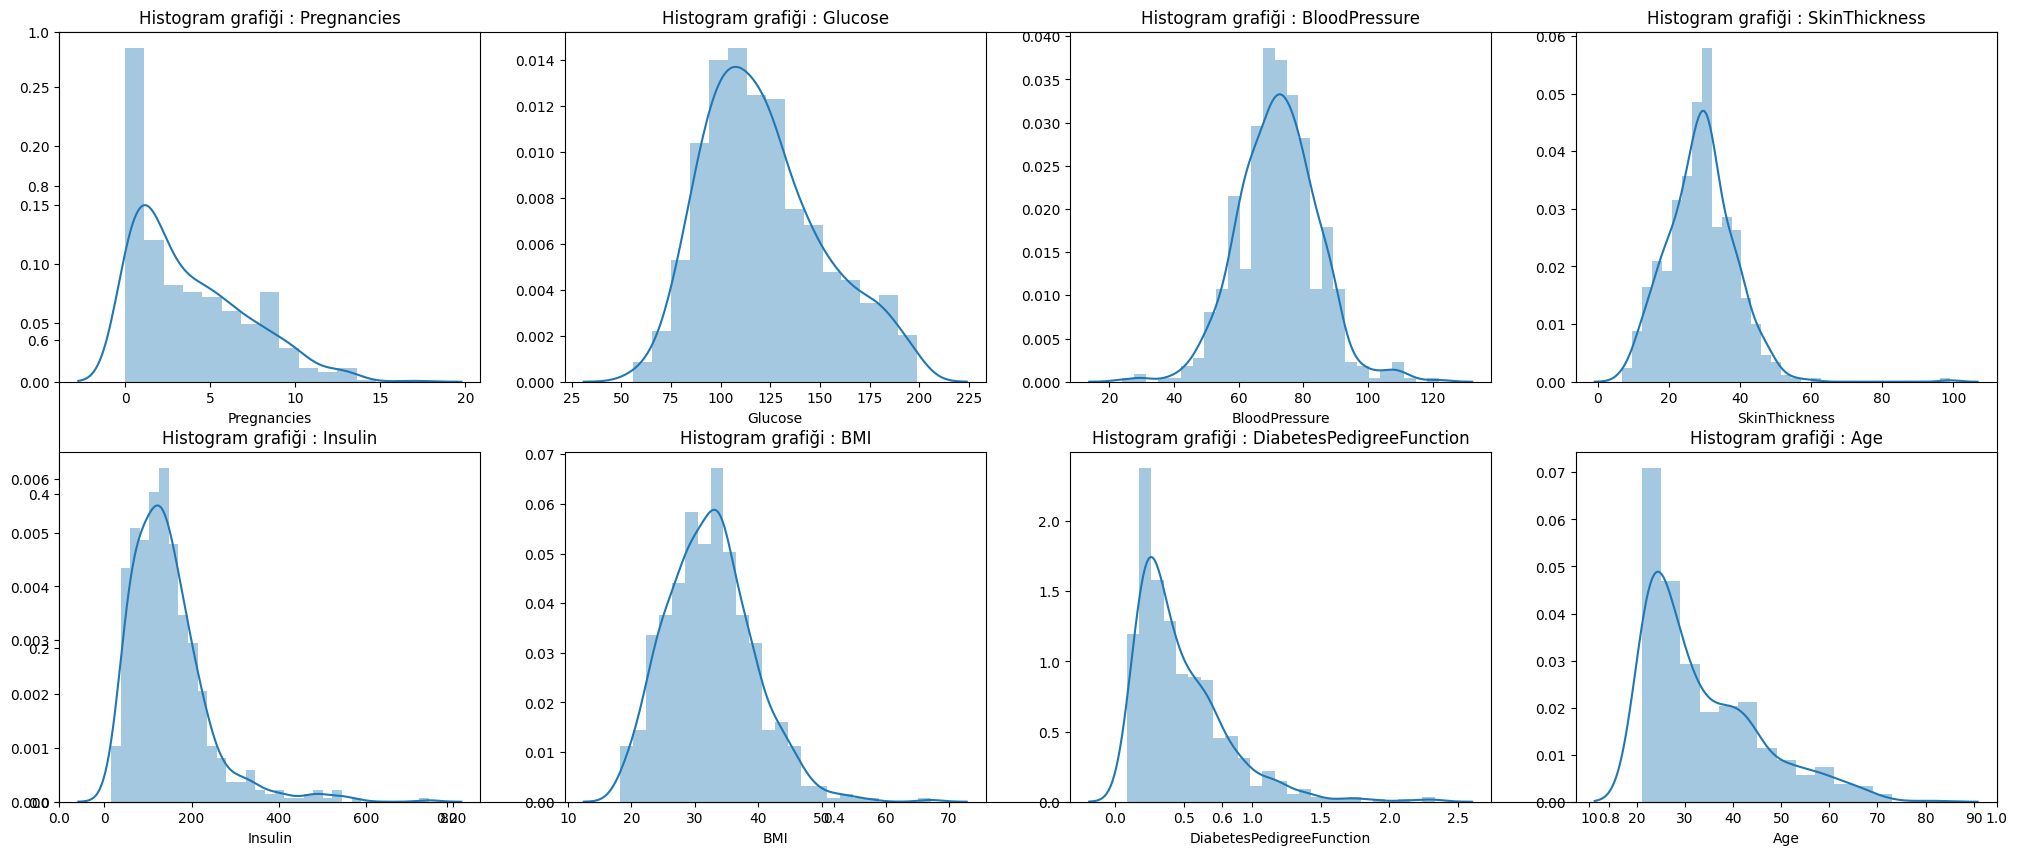

In [197]:
fig, ax = plt.subplots(figsize = (25,10))
for i in range(len(oz_data)):
    plt.subplot(2,4,i+1)
    sns.distplot(diab_data[oz_data[i]])
    title = 'Histogram grafiği : ' + oz_data[i]
    plt.title(title)
    plt.ylabel("")
plt.show()

BMI, Age, Insulin, DiabetesPedigreeFunction, SkinThickness ve Pregnancies sütunlarının sola çarpık dağılıma (left-skewed distribution) sahip oldukları görülmektedir. Glucose ve BloodPressure ise normal dağılıma sahip sütunlardır. Aykırı değer temizliği yapılırken normal dağılıma sahip sütunlar için Z-score tekniği, çarpık dağılıma sahip sütunlar için Interquartile Range Tekniği kullanılacaktır.

Ayrık değer temizliği için birçok farklı teknik kullanılmaktadır. Bunlardan bazıları;

- Z-Score Tekniği

- Çeyrekler açıklığı (Quartile Deviation Tekniği)

- Local Outlier Factor (LOF) Tekniği

- Isolation Forest Tekniği

- DBSCAN Tekniği

- Interquartile Range Tekniği

Bu datasetinde bu tekniklerden Z-Score Tekniği ve Interquartile Range Tekniği kullanılacaktır.

In [198]:

fig = make_subplots(rows=4, cols=2, 
                    row_heights=[1600, 1600,1600,1600], 
                    column_widths=[400, 400])

fig.add_trace(go.Box(y=diab_data['Glucose'],name="Glucose"), row=1, col=1)
fig.add_trace(go.Box(y=diab_data['Age'],name="Age"), row=1, col=2)
fig.add_trace(go.Box(y=diab_data['Insulin'],name="Insulin"), row=2, col=1)
fig.add_trace(go.Box(y=diab_data['BMI'],name="BMI"), row=2, col=2)
fig.add_trace(go.Box(y=diab_data['SkinThickness'],name="SkinThickness"), row=3, col=1)
fig.add_trace(go.Box(y=diab_data['DiabetesPedigreeFunction'],name="DiabetesPedigreeFunction"), row=3, col=2)
fig.add_trace(go.Box(y=diab_data['Pregnancies'],name="Pregnancies"), row=4, col=1)
fig.add_trace(go.Box(y=diab_data['BloodPressure'],name="BloodPressure"), row=4, col=2)

fig.update_layout(width=1600, height=1200)

fig.show()

Glucose sütunu hariç her sütunda aykırı değerler olduğu görülmektedir.

In [199]:
def Zsc (df,oz):
    aykırı=[]
    threshold = 3
    ortalama = np.mean(df[oz])
    stand = np.std(df[oz])
    alt = ortalama - threshold*stand
    ust = ortalama + threshold*stand
    say = len(df[(df[oz]<alt) | (df[oz]>ust)])
    for i in df[oz]:
        if i>ust or i<alt:
            aykırı.append(i)
    return alt, ust,say,aykırı

Z-score tekniği için yazılan fonksiyondur. Normal dağılıma sahip sütunlar için bu fonksiyon kullanılacaktır.

In [200]:
def iqr(df,oz):
    aykırı=[]
    q25 = np.nanpercentile(df[oz], 25)
    q75 = np.nanpercentile(df[oz], 75)
    iqr = (q75 - q25)*1.5
    alt = q25 - iqr
    ust = q75 + iqr
    say = len(df[(df[oz]<alt) | (df[oz]>ust)])
    for i in df[oz]:
        if i>ust or i<alt:
            aykırı.append(i)
    return alt,ust,say,aykırı

IQR tekniği için yazılan fonksiyondur. Çarpık dağılıma sahip sütunlar için bu fonksiyon kullanılacaktır.

Bu fonksiyonlar ile aykı değerler tespit edilecek ve birbirinden çok uzak değerler ise veri setinden uzaklaştırılacaktır çünkü sağlık ile alakalı bir problem olduğu için veriler birbirlerinden farklı çıkabilmektedir. Ancak her aykırı değer olarak görülen satırlar veri setinden uzaklaştırılırsa çok fazla veri kaybı olacaktır ve bu da modelin performansını etkileyecektir.

In [201]:
alt,ust,say,l=Zsc(diab_data,'BloodPressure')
print("BloodPressure sütunu için:\n Alt limit:{}\n Üst limit:{}\n Aykırı değer sayısı:{}\nAykırı değerler:{}".format(alt,ust,say,l))

BloodPressure sütunu için:
 Alt limit:35.177827221516644
 Üst limit:109.26907831594264
 Aykırı değer sayısı:8
Aykırı değerler:[110.0, 122.0, 114.0, 30.0, 24.0, 30.0, 110.0, 110.0]


In [202]:
diab_data=diab_data.drop(diab_data[(diab_data['BloodPressure']<=alt) | (diab_data['BloodPressure']>=ust)].index)

In [203]:
alt1,ust1,say1,l1=iqr(diab_data,'Age')
print("Age sütunu için:\n Alt sınır: {}\n Üst sınır: {}\n Aykırı değer Sayısı: {}\n Aykırı Değerler:{}".format(alt1,ust1,say1,l1))

Age sütunu için:
 Alt sınır: -1.5
 Üst sınır: 66.5
 Aykırı değer Sayısı: 6
 Aykırı Değerler:[70.0, 67.0, 81.0, 69.0, 72.0, 69.0]


In [204]:
diab_data=diab_data.drop(diab_data[(diab_data['Age']<=alt1) | (diab_data['Age']>=ust1)].index)

In [205]:
alt2,ust2,say2,l2=iqr(diab_data,'Pregnancies')
print("Pregnancies sütunu için:\n Alt sınır: {}\n Üst sınır: {}\n Aykırı değer Sayısı: {}\n Aykırı Değerler:{}".format(alt2,ust2,say2,l2))

Pregnancies sütunu için:
 Alt sınır: -6.5
 Üst sınır: 13.5
 Aykırı değer Sayısı: 2
 Aykırı Değerler:[14.0, 17.0]


In [206]:
diab_data=diab_data.drop(diab_data[(diab_data['Pregnancies']<=alt2) |(diab_data['Pregnancies']>=ust2)].index)

In [207]:
alt3,ust3,say3,l3=iqr(diab_data,'BMI')
print("BMI sütunu için:\n Alt sınır: {}\n Üst sınır: {}\n Aykırı değer Sayısı: {}\n Aykırı Değerler:{}".format(alt3,ust3,say3,l3))

BMI sütunu için:
 Alt sınır: 14.400000000000006
 Üst sınır: 49.599999999999994
 Aykırı değer Sayısı: 7
 Aykırı Değerler:[53.2, 49.6, 52.9, 57.3, 52.3, 49.7, 50.0]


In [208]:
diab_data=diab_data.drop(diab_data[(diab_data['BMI']<=alt3) |(diab_data['BMI']>=ust3)].index)

In [209]:
alt4,ust4,say4,l4=iqr(diab_data,'SkinThickness')
print("SkinThickness sütunu için:\n Alt sınır: {}\n Üst sınır: {}\n Aykırı değer Sayısı: {}\n Aykırı Değerler:{}".format(alt4,ust4,say4,l4))

SkinThickness sütunu için:
 Alt sınır: 5.900000000000002
 Üst sınır: 51.5
 Aykırı değer Sayısı: 4
 Aykırı Değerler:[60.0, 54.0, 99.0, 52.0]


In [210]:
diab_data=diab_data.drop(diab_data[(diab_data['SkinThickness']<=alt4) |(diab_data['SkinThickness']>=ust4)].index)

In [211]:
alt5,ust5,say5,l5=iqr(diab_data,'Insulin')
print("Insulin sütunu için:\n Alt sınır: {}\n Üst sınır: {}\n Aykırı değer Sayısı: {}\n Aykırı Değerler:{}".format(alt5,ust5,say5,l5))

Insulin sütunu için:
 Alt sınır: -53.50000000000003
 Üst sınır: 316.1
 Aykırı değer Sayısı: 29
 Aykırı Değerler:[325.0, 360.0, 744.0, 480.0, 325.0, 545.0, 335.0, 326.0, 540.0, 402.0, 358.8, 495.0, 387.0, 478.0, 370.0, 392.0, 342.0, 359.4, 495.0, 330.0, 440.0, 414.0, 342.0, 465.0, 510.0, 543.0, 331.0, 321.0, 579.0]


In [212]:
diab_data=diab_data.drop(diab_data[(diab_data['Insulin']<=alt5) | (diab_data['Insulin']>=ust5)].index)

In [213]:
alt6,ust6,say6,l6=iqr(diab_data,'DiabetesPedigreeFunction')
print("DiabetesPedigreeFunction sütunu için:\n Alt sınır: {}\n Üst sınır: {}\n Aykırı değer Sayısı: {}\n Aykırı Değerler:{}".format(alt6,ust6,say6,l6))

DiabetesPedigreeFunction sütunu için:
 Alt sınır: -0.32762500000000006
 Üst sınır: 1.199375
 Aykırı değer Sayısı: 18
 Aykırı Değerler:[1.224, 1.222, 1.781, 1.4, 1.353, 1.441, 2.288, 1.698, 1.39, 1.6, 1.292, 1.224, 1.461, 1.391, 1.258, 1.268, 1.731, 1.251]


In [214]:
diab_data=diab_data.drop(diab_data[(diab_data['DiabetesPedigreeFunction']<=alt6) | (diab_data['DiabetesPedigreeFunction']>=ust6)].index)

In [215]:
diab_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,90.0,62.0,12.0,43.0,27.2,0.580,24.0,0.0
1,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40.0,0.0
2,2.0,105.0,58.0,40.0,94.0,34.9,0.225,25.0,0.0
3,1.0,146.0,56.0,32.2,132.6,29.7,0.564,29.0,0.0
4,0.0,95.0,64.0,39.0,105.0,44.6,0.366,22.0,0.0
...,...,...,...,...,...,...,...,...,...
609,2.0,134.0,70.0,25.4,135.8,28.9,0.542,23.0,1.0
610,4.0,76.0,62.0,30.4,48.0,34.0,0.391,25.0,0.0
611,1.0,97.0,70.0,40.0,119.2,38.1,0.218,30.0,0.0
612,10.0,111.0,70.0,27.0,98.2,27.5,0.141,40.0,1.0


In [216]:
print("Aykırı değer temizliği sonunda toplamda {} satır veri setinden uzaklaştırılmıştır.".format(614-diab_data.shape[0]))

Aykırı değer temizliği sonunda toplamda 74 satır veri setinden uzaklaştırılmıştır.


## Özellik Mühendisliği (Feature Engineering)

Bu aşamada özelliklerin birbirleriyle olan ilişkisi incelenecek ve diyabet hastası olan ile olmayan arasındaki farkı en iyi ayıracak özellikler ortaya çıkarılmaya çalışılacaktır.

In [217]:
def oz_plot(diab_data_yeni,oz1, oz2) :  
    H = diab_data_yeni[(diab_data_yeni['Outcome'] != 0)]
    N = diab_data_yeni[(diab_data_yeni['Outcome'] == 0)]
    tr1 = go.Scatter(
        x = H[oz1],
        y = H[oz2],
        name = 'Diyabet Hastası Birey',
        mode = 'markers', 
        marker = dict(color = '#E11919',
            line = dict(
                width = 1)))
    tr2 = go.Scatter(
        x = N[oz1],
        y = N[oz2],
        name = 'Sağlıklı Birey',
        mode = 'markers',
        marker = dict(color = '#98C5FF',
            line = dict(
                width = 1)))

    layout = dict(title = oz1 +" ve "+oz2,
                yaxis = dict(title = oz2),
                  xaxis = dict(title = oz1))
    plots = [tr1, tr2]
    fig = dict(data = plots, layout=layout)
    iplot(fig)

Sütunların birbirleri ile olan ilişkilerini çizdirebilmek adına tekrar tekrar kod yazmamak için oz_plot adında bir fonksiyon oluşturulmuştur.

In [218]:
def barplot(diab_data,oz) :
    H = diab_data[(diab_data['Outcome'] != 0)]
    N = diab_data[(diab_data['Outcome'] == 0)]

    tr1 = go.Bar(
        x=H[oz].value_counts().keys().tolist(),
        y=H[oz].value_counts().values.tolist(),
        text=H[oz].value_counts().values.tolist(),
        name='Diyabet Hastası Birey', 
        marker=dict(
        color='#E11919'))

    tr2 = go.Bar(
        x=N[oz].value_counts().keys().tolist(),
        y=N[oz].value_counts().values.tolist(),
        text=N[oz].value_counts().values.tolist(),
        name='Sağlıklı Birey', 
        marker=dict(color='#98C5FF'))

    layout = dict(title = str(oz))

    figure = go.Figure(data=[tr1, tr2], layout=layout)
    iplot(figure)

Bu fonksiyon da yeni oluşturulan özelliğin diyabet hastalarını birbirinden ne kadar iyi ayırdığının görselleştirmesini yapan bir fonksiyondur.

In [219]:
oz_plot(diab_data,'Pregnancies','BMI')

Pregnanciess ve BMI sütunlarının özellikleri bir arada incelendiğinde BMI değeri 31'den küçük ve eşitken Pregnancies ise 4'ten küçük ve eşitken sağlıklı insan sayısının diyabet hastalığı olan insan sayısına göre bir hayli fazla olduğu görülmektedir. Bu yüzden bu değerlerden bir özellik çıkarmak model için etkili bir özellik olabilir.

In [220]:
diab_data.loc[:,'OZ1']=1
diab_data.loc[(diab_data['Pregnancies']<=4) & (diab_data['BMI']<=31),'OZ1']=0
X_test.loc[:,'OZ1']=1
X_test.loc[(X_test['Pregnancies']<=4) & (X_test['BMI']<=31),'OZ1']=0

In [221]:
barplot(diab_data,'OZ1')

In [222]:
oz_plot(diab_data,'Glucose','BMI')

Glucose ve BMI sütunlarının özellikleri bir arada incelendiğinde BMI değeri 34'ten küçük ve eşitken Glucose ise 100'den küçük ve eşitken sağlıklı insan sayısının diyabet hastalığı olan insan sayısına göre bir hayli fazla olduğu görülmektedir. Bu yüzden bu değerlerden bir özellik çıkarmak model için etkili bir özellik olabilir.

In [223]:
diab_data.loc[:,'OZ2']=1
diab_data.loc[(diab_data['BMI']<=34) & (diab_data['Glucose']<=100),'OZ2']=0
X_test.loc[:,'OZ2']=1
X_test.loc[(X_test['BMI']<=34) & (X_test['Glucose']<=100),'OZ2']=0

In [224]:
barplot(diab_data,'OZ2')

In [225]:
oz_plot(diab_data,'BloodPressure','Glucose')

Glucose ve BloodPressure sütunlarının özellikleri bir arada incelendiğinde Glucose değeri 105'ten küçük ve eşitken BloodPressure ise 70'ten küçük ve eşitken sağlıklı insan sayısının diyabet hastalığı olan insan sayısına göre bir hayli fazla olduğu görülmektedir. Bu yüzden bu değerlerden bir özellik çıkarmak model için etkili bir özellik olabilir.

In [226]:
diab_data.loc[:,'OZ3']=1
diab_data.loc[(diab_data['Glucose']<=105) & (diab_data['BloodPressure']<=70),'OZ3']=0
X_test.loc[:,'OZ3']=1
X_test.loc[(X_test['Glucose']<=105) & (X_test['BloodPressure']<=70),'OZ3']=0

In [227]:
barplot(diab_data,'OZ3')

In [228]:
oz_plot(diab_data,'DiabetesPedigreeFunction','SkinThickness')

DiabetesPedigreeFunction ve SkinThicknness sütunlarının özellikleri bir arada incelendiğinde DiabetesPedigreeFunction değeri 0.32'den küçük ve eşitken SkinThickness ise 22.5'ten küçük ve eşitken sağlıklı insan sayısının diyabet hastalığı olan insan sayısına göre bir hayli fazla olduğu görülmektedir. Bu yüzden bu değerlerden bir özellik çıkarmak model için etkili bir özellik olabilir.

In [229]:
diab_data.loc[:,'OZ4']=1
diab_data.loc[(diab_data['DiabetesPedigreeFunction']<=0.32) & (diab_data['SkinThickness']<=22.5),'OZ4']=0
X_test.loc[:,'OZ4']=1
X_test.loc[(X_test['DiabetesPedigreeFunction']<=0.32) & (X_test['SkinThickness']<=22.5),'OZ4']=0

In [230]:
barplot(diab_data,'OZ4')

In [231]:
oz_plot(diab_data,'Age','SkinThickness')

Age ve SkinThicknness sütunlarının özellikleri bir arada incelendiğinde Age değeri 26'dan küçük ve eşitken SkinThickness ise 32'den küçük ve eşitken sağlıklı insan sayısının diyabet hastalığı olan insan sayısına göre bir hayli fazla olduğu görülmektedir. Bu yüzden bu değerlerden bir özellik çıkarmak model için etkili bir özellik olabilir.

In [232]:
diab_data.loc[:,'OZ5']=1
diab_data.loc[(diab_data['SkinThickness']<=32) & (diab_data['Age']<=26),'OZ5']=0
X_test.loc[:,'OZ5']=1
X_test.loc[(X_test['SkinThickness']<=32) & (X_test['Age']<=26),'OZ5']=0

In [233]:
barplot(diab_data,'OZ5')

In [234]:
oz_plot(diab_data,'BloodPressure','Insulin')

Insulin ve BloodPresssure sütunlarının özellikleri bir arada incelendiğinde Insulin değeri 120'den küçük ve eşitken BloodPressure ise 62'den küçük ve eşitken sağlıklı insan sayısının diyabet hastalığı olan insan sayısına göre bir hayli fazla olduğu görülmektedir. Bu yüzden bu değerlerden bir özellik çıkarmak model için etkili bir özellik olabilir.

In [235]:
diab_data.loc[:,'OZ6']=1
diab_data.loc[(diab_data['BloodPressure']<=62) & (diab_data['Insulin']<=120),'OZ6']=0
X_test.loc[:,'OZ6']=1
X_test.loc[(X_test['BloodPressure']<=64) & (X_test['Insulin']<=100),'OZ6']=0

In [236]:
barplot(diab_data,'OZ6')

In [237]:
diab_data['OZ7'] = diab_data['Glucose'] / diab_data['Age']
X_test['OZ7'] = X_test['Glucose'] / X_test['Age']

Genç yaşlarda çok yüksek glucose değerleri beklenmemektedir. Bu yüzden bu oran diyabet hastalığını tahmin etmemizde bize yardımcı olabilir.

In [238]:
num_col= diab_data.loc[:,['Pregnancies','Glucose','BMI','BloodPressure',
                          'SkinThickness','Insulin','DiabetesPedigreeFunction','Age','OZ7']]

<Axes: >

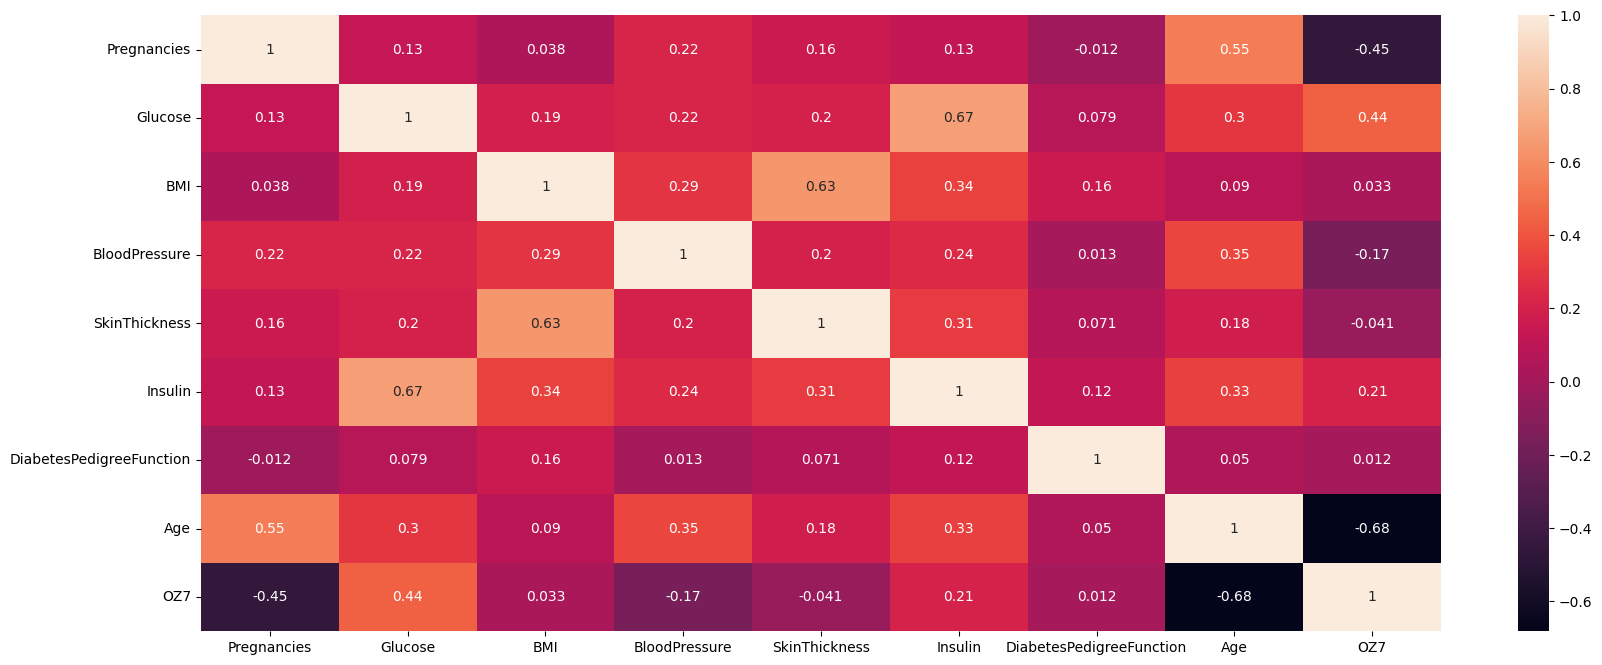

In [239]:
plt.figure(figsize=(20,8))
sns.heatmap(num_col.corr(),annot=True)

# Modelleme

In [240]:
X_train=diab_data.drop("Outcome",axis=1,inplace=False)
y_train=diab_data['Outcome']

## Temel Modeller

In [241]:
isim = ["Lojistik Regresyon","K-En yakın komşu","Naive Bayes",
         "Karar Ağaçları","Destek Vektör Makinaları", "Rastgele Orman Algoritması",
         "Naive Bayes"]

sınıf_alg = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(random_state=20),
    SVC(),
    RandomForestClassifier(random_state=20)
]

In [242]:
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import StratifiedKFold

son_df = pd.DataFrame(columns=['İsim', 'Temel Model Doğruluk'])
son_l=[]
knn_kcv_index = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)

for name, clf in zip(isim, sınıf_alg):
    l=[]
    l.append(name)
    ort_skor = cross_val_score(clf, X_train, y_train, cv=knn_kcv_index, scoring='accuracy').mean() * 100
    l.append(ort_skor)
    son_l.append(l)

son_df = pd.DataFrame(son_l, columns=['İsim', 'Temel Model Doğruluk'])

print(son_df)


                         İsim  Temel Model Doğruluk
0          Lojistik Regresyon             75.370370
1            K-En yakın komşu             72.777778
2                 Naive Bayes             70.740741
3              Karar Ağaçları             73.518519
4    Destek Vektör Makinaları             77.037037
5  Rastgele Orman Algoritması             78.333333


In [243]:
son_df

,İsim,Temel Model Doğruluk
0,Lojistik Regresyon,75.370370
1,K-En yakın komşu,72.777778
2,Naive Bayes,70.740741
3,Karar Ağaçları,73.518519
4,Destek Vektör Makinaları,77.037037
5,Rastgele Orman Algoritması,78.333333


In [244]:
kcv_index = StratifiedKFold(n_splits=5, shuffle=True, random_state=20) 

In [245]:
def pl_conf_mat(isim,conf_matrix):
    fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))
    plt.title(isim, fontsize=15)
    plt.show()


### Lojistik Regresyon

In [246]:
lg_pipe = make_pipeline(KNNImputer(n_neighbors=5),MinMaxScaler(), LogisticRegression())

lg_param_grid = [{'logisticregression__max_iter' : [10,15,20,50],
                     'logisticregression__C' : [0.6,0.7,0.8,0.9,1],
                     'logisticregression__tol' : [0.6,0.7,0.8,0.9,1],
                     'logisticregression__solver' : ['liblinear','lbfgs']
                          }
              ]



lg_grid_search = GridSearchCV(estimator = lg_pipe, param_grid = lg_param_grid, scoring='accuracy', cv = kcv_index, return_train_score=True)

In [247]:
lg_grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid=[{'logisticregression__C': [0.6, 0.7, 0.8, 0.9, 1],
                          'logisticregression__max_iter': [10, 15, 20, 50],
                          'logisticregression__solver': ['liblinear', 'lbfgs'],
                          'logisticregression__tol': [0.6, 0.7, 0.8, 0.9, 1]}],
             return_train_score=True, scoring='accuracy')

In [248]:
lg_grid_search.best_score_

0.7555555555555555

In [249]:
lg_grid_search.best_params_

{'logisticregression__C': 0.9,
 'logisticregression__max_iter': 10,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.6}

In [250]:
lg_grid_search.score(X_test, y_test)*100

74.02597402597402

In [251]:
lg_pred = lg_grid_search.predict(X_test)
print(classification_report(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



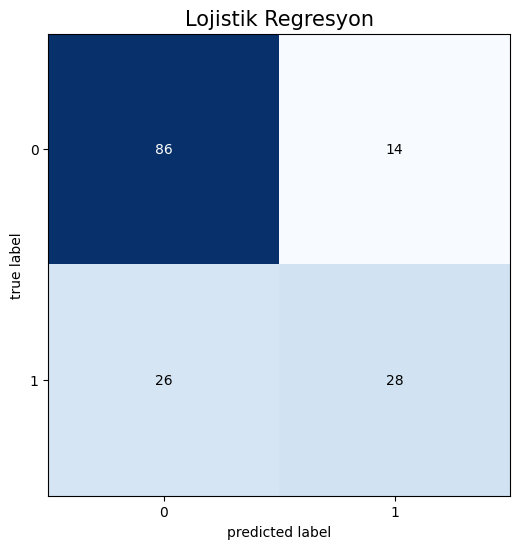

In [252]:
conf_m_lg=confusion_matrix(y_test,lg_pred)
pl_conf_mat('Lojistik Regresyon',conf_m_lg)


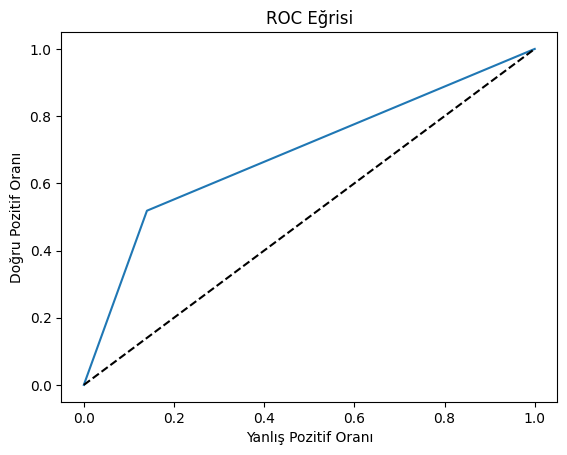

In [253]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lg_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.show()


## K-En Yakın Komşu Algoritması

In [254]:
knn_pipe = make_pipeline(KNNImputer(n_neighbors=5),MinMaxScaler(), KNeighborsClassifier())


knn_param_grid = {'kneighborsclassifier__n_neighbors': list(range(17, 50)),
                  'kneighborsclassifier__metric' : ['minkowski', 'euclidian', 'manhattan','chebyshev']
                 } 





knn_grid_search = GridSearchCV(estimator = knn_pipe, param_grid = knn_param_grid, 
                           scoring='accuracy', cv = kcv_index, 
                           return_train_score=True) 

In [255]:
knn_grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric': ['minkowski',
                                                          'euclidian',
                                                          'manhattan',
                                                          'chebyshev'],
                         'kneighborsclassifier__n_neighbors': [17, 18, 19, 20,
                                                               21, 22, 23, 24,
                                                               25, 26, 27, 28,
                                                               29, 30, 31, 32,
                                                               33, 34, 35, 36,
                                                               37, 38, 39, 40,
                                                               41, 42, 43, 44,
                                                               45, 46, ...]},
             return_train_score=True, scoring='accuracy')

In [256]:
knn_grid_search.best_params_

{'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 25}

In [257]:
knn_grid_search.best_score_

0.7925925925925925

In [258]:
knn_grid_search.score(X_test, y_test)*100

77.27272727272727

In [259]:
knn_pred = knn_grid_search.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



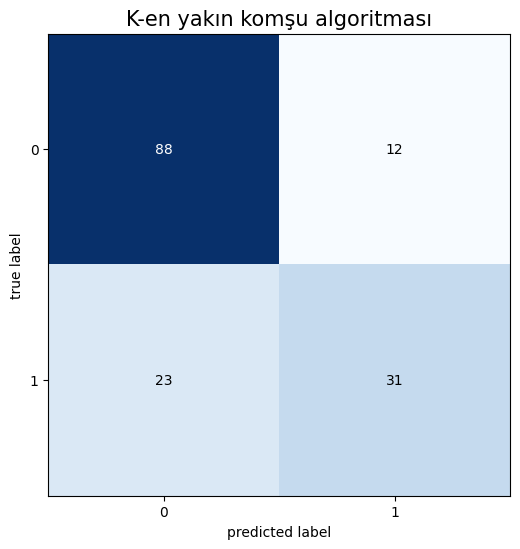

In [260]:
conf_m_knn=confusion_matrix(y_test,knn_pred)
pl_conf_mat('K-en yakın komşu algoritması',conf_m_knn)

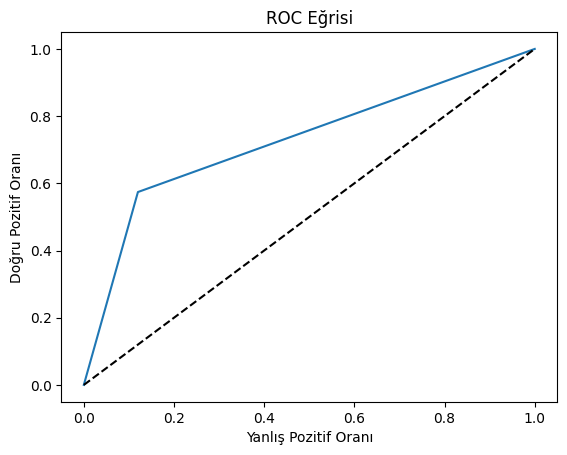

In [261]:
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.show()

## Naive-Bayes Algoritması

In [262]:

gb_pipe = make_pipeline(KNNImputer(n_neighbors=5), RobustScaler(), GaussianNB())


gb_param_grid = {'gaussiannb__var_smoothing': np.linspace(3.3,4,10)}



gb_grid_search = GridSearchCV(estimator = gb_pipe, param_grid = gb_param_grid, 
                           scoring='accuracy', cv = kcv_index, 
                           return_train_score=True) 

In [263]:
gb_grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('robustscaler', RobustScaler()),
                                       ('gaussiannb', GaussianNB())]),
             param_grid={'gaussiannb__var_smoothing': array([3.3       , 3.37777778, 3.45555556, 3.53333333, 3.61111111,
       3.68888889, 3.76666667, 3.84444444, 3.92222222, 4.        ])},
             return_train_score=True, scoring='accuracy')

In [264]:
gb_grid_search.best_params_

{'gaussiannb__var_smoothing': 3.533333333333333}

In [265]:
gb_grid_search.best_score_

0.7648148148148148

In [266]:
gb_grid_search.score(X_test, y_test)*100

74.02597402597402

In [267]:
gb_pred = gb_grid_search.predict(X_test)
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       100
           1       0.71      0.44      0.55        54

    accuracy                           0.74       154
   macro avg       0.73      0.67      0.68       154
weighted avg       0.73      0.74      0.72       154



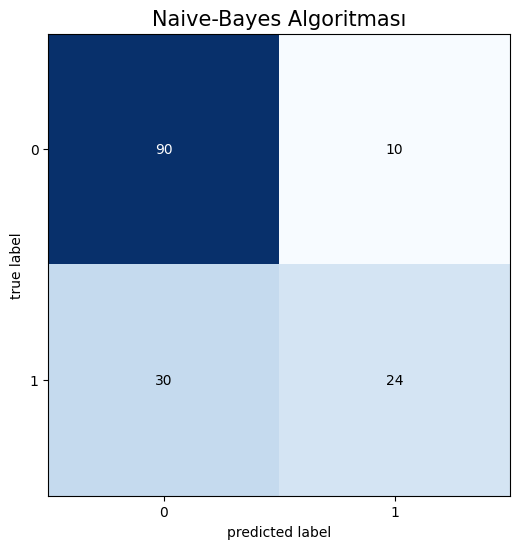

In [268]:
conf_m_gb=confusion_matrix(y_test,gb_pred)
pl_conf_mat('Naive-Bayes Algoritması',conf_m_gb)

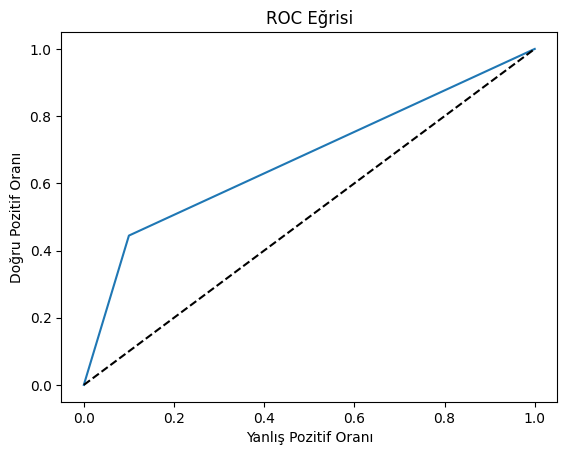

In [269]:
fpr, tpr, thresholds = roc_curve(y_test, gb_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.show()

## Karar Ağaçları Algoritması

In [270]:
dtc_pipe = make_pipeline(KNNImputer(n_neighbors=5),DecisionTreeClassifier(random_state=20))

dtc_params = {
         'decisiontreeclassifier__max_depth':[2,3,4,5,6,7,10,20,30,50,100],
         'decisiontreeclassifier__min_samples_leaf':[10,15,20,30,35,40],
         'decisiontreeclassifier__criterion': ["gini", "entropy"],
         'decisiontreeclassifier__max_features': [0.3,0.45,0.5,0.51,0.52,0.53,0.55,0.6,0.7]
         }

dtc_grid_search = GridSearchCV(estimator=dtc_pipe, param_grid=dtc_params,scoring='accuracy',cv=kcv_index)

In [271]:
dtc_grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=20))]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [2, 3, 4, 5, 6, 7,
                                                               10, 20, 30, 50,
                                                               100],
                         'decisiontreeclassifier__max_features': [0.3, 0.45,
                                                                  0.5, 0.51,
                                                                  0.52, 0.53,
                                                                  0.55, 0.6,
                                                                  0.7],
                         'decisiontreeclassifier__min_samples_leaf': [10, 15,
                                                                      20, 30,
                                                                      35, 40]},
             scoring='accuracy')

In [272]:
dtc_grid_search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__max_features': 0.55,
 'decisiontreeclassifier__min_samples_leaf': 35}

In [273]:
dtc_grid_search.best_score_

0.7907407407407407

In [274]:
dtc_grid_search.score(X_test, y_test)*100

74.67532467532467

In [275]:
dtc_pred = dtc_grid_search.predict(X_test)
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



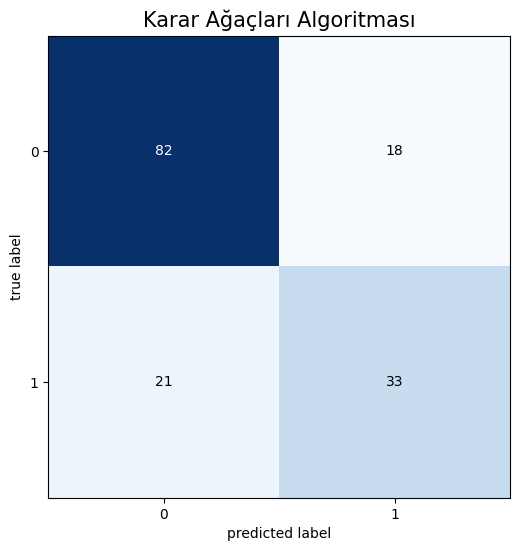

In [276]:
conf_m_dtc=confusion_matrix(y_test,dtc_pred)
pl_conf_mat('Karar Ağaçları Algoritması',conf_m_dtc)

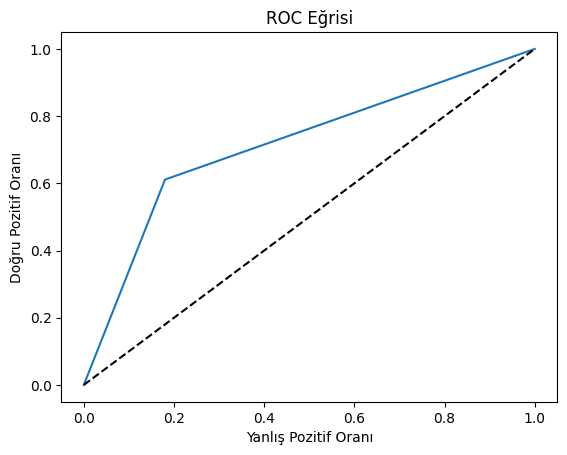

In [277]:
fpr, tpr, thresholds = roc_curve(y_test, dtc_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.show()

## Destek Vektör Makinaları

In [278]:

svc_pipe = make_pipeline(KNNImputer(n_neighbors=5),MinMaxScaler(),SVC())

param_SVC = {'svc__C': [1,2.05,2.1,2.15,2.2,2.25,2.5,2.7,2.75,2.9,3,5],  
            'svc__tol': [0.5,1,2,3], 
            'svc__gamma':["auto","entropy"],
            'svc__kernel':["linear", "poly", "rbf" ]}  
   

svc_grid_search = GridSearchCV(estimator = svc_pipe, param_grid = param_SVC, 
                           scoring='accuracy', cv = kcv_index, 
                           return_train_score=True) 
   

In [279]:
svc_grid_search.fit(X_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [1, 2.05, 2.1, 2.15, 2.2, 2.25, 2.5, 2.7,
                                    2.75, 2.9, 3, 5],
                         'svc__gamma': ['auto', 'entropy'],
                         'svc__kernel': ['linear', 'poly', 'rbf'],
                         'svc__tol': [0.5, 1, 2, 3]},
             return_train_score=True, scoring='accuracy')

In [280]:
svc_grid_search.best_params_

{'svc__C': 3, 'svc__gamma': 'auto', 'svc__kernel': 'rbf', 'svc__tol': 0.5}

In [281]:
svc_grid_search.best_score_

0.8055555555555556

In [282]:
svc_grid_search.score(X_test, y_test)*100

75.32467532467533

In [283]:
svc_pred = svc_grid_search.predict(X_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       100
           1       0.65      0.65      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



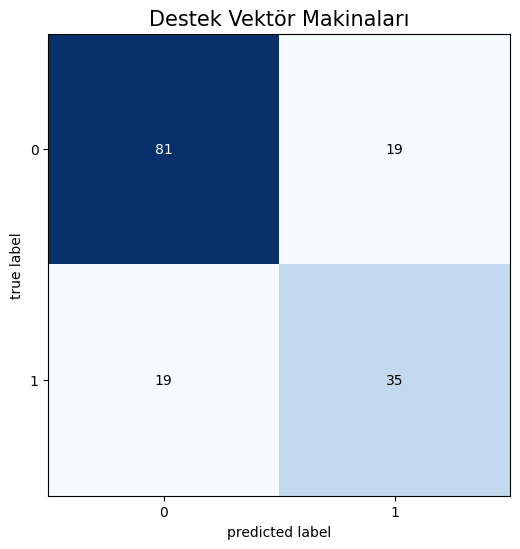

In [284]:
conf_m_svc=confusion_matrix(y_test,svc_pred)
pl_conf_mat('Destek Vektör Makinaları',conf_m_svc)

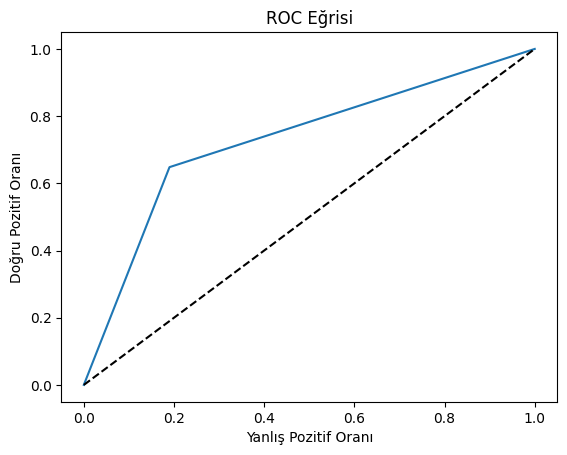

In [285]:
fpr, tpr, thresholds = roc_curve(y_test, svc_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.show()

## Rastgele Orman Algoritması

In [286]:
rf_pipe = make_pipeline(KNNImputer(n_neighbors=5),MinMaxScaler(),RandomForestClassifier(random_state=20))


param_rf = {'randomforestclassifier__n_estimators': [10,17,25,30],
            'randomforestclassifier__criterion': ["entropy","gini"],
            'randomforestclassifier__max_depth': [10,11,12],
            'randomforestclassifier__min_samples_leaf': [2,3],
            'randomforestclassifier__min_samples_split': [2,3,5],
            'randomforestclassifier__max_features':[0.2,0.3,0.4]}


rf_grid = GridSearchCV(estimator = rf_pipe, param_grid = param_rf, 
                           scoring='accuracy', cv = kcv_index, 
                           return_train_score=True) 

In [287]:
rf_pipe = make_pipeline(KNNImputer(n_neighbors=5),MinMaxScaler(),RandomForestClassifier(random_state=20))


param_rf = {'randomforestclassifier__n_estimators': [17],
            'randomforestclassifier__criterion': ["entropy"],
            'randomforestclassifier__max_depth': [11],
            'randomforestclassifier__min_samples_leaf': [3],
            'randomforestclassifier__min_samples_split': [2,3,5,10],
            'randomforestclassifier__max_features':[0.1,0.2,0.3,0.4]}


rf_grid = GridSearchCV(estimator = rf_pipe, param_grid = param_rf, 
                           scoring='accuracy', cv = kcv_index, 
                           return_train_score=True) 

In [288]:
rf_grid.fit(X_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=20))]),
             param_grid={'randomforestclassifier__criterion': ['entropy'],
                         'randomforestclassifier__max_depth': [11],
                         'randomforestclassifier__max_features': [0.1, 0.2, 0.3,
                                                                  0.4],
                         'randomforestclassifier__min_samples_leaf': [3],
                         'randomforestclassifier__min_samples_split': [2, 3, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [17]},
             return_train_score=True, scoring='accuracy')

In [289]:
rf_grid.best_params_

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': 11,
 'randomforestclassifier__max_features': 0.2,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 17}

In [290]:
rf_grid.best_score_

0.8018518518518519

In [291]:
rf_grid.score(X_test, y_test)*100

78.57142857142857

In [292]:
rf_pred = rf_grid.predict(X_test)
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       100
           1       0.69      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



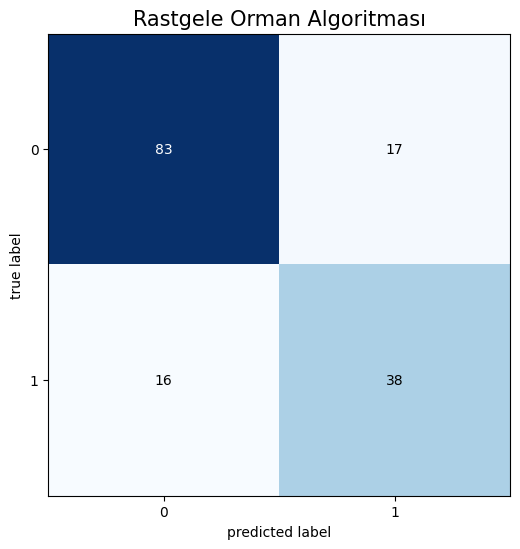

In [293]:
conf_m_rf=confusion_matrix(y_test,rf_pred)
pl_conf_mat('Rastgele Orman Algoritması',conf_m_rf)

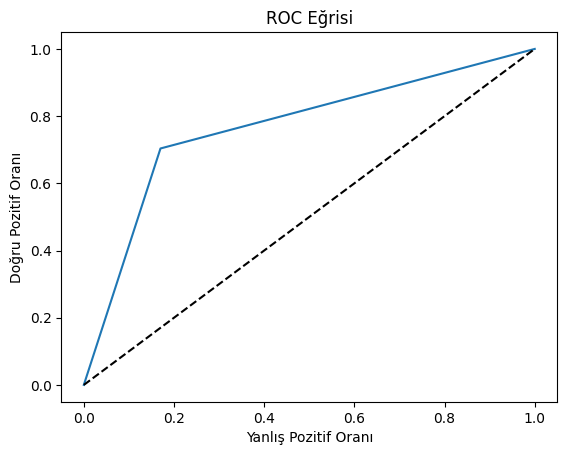

In [294]:
fpr, tpr, thresholds = roc_curve(y_test,rf_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.show()

## SMOTE

In [296]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=20)
columns = X_train.columns
os_data_x,os_data_y = os.fit_resample(X_train, y_train)

In [297]:
deg,say=np.unique(y_train,return_counts=True)
for value, count in zip(deg, say):
    print(f"{value}: {count}")

0.0: 370
1.0: 170


In [298]:
deg,say=np.unique(os_data_y,return_counts=True)
for value, count in zip(deg, say):
    print(f"{value}: {count}")

0.0: 370
1.0: 370


## Lojistik Regresyon SMOTE

In [299]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
lg_pipe = make_pipeline(KNNImputer(n_neighbors=5),MinMaxScaler(), LogisticRegression())

lg_param_grid = [{'logisticregression__max_iter' : [2,3,5,10,20,50,100],
                     'logisticregression__C' : np.logspace(-4, 4, 20),
                     'logisticregression__tol' : [1, 0.1,0.05, 0.01, 0.001, 0.0001],
                     'logisticregression__solver' : ['liblinear', 'newton-cg','lbfgs']
                          }
              ]



lg_os_grid_search = GridSearchCV(estimator = lg_pipe, param_grid = lg_param_grid, scoring='accuracy', cv = kcv_index, return_train_score=True)
lg_os_grid_search.fit(os_data_x,os_data_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid=[{'logisticregression__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'logisticregression__max_iter': [2, 3, 5, 10, 20, 50,
                                                           100],
                          'logisticregression__solver': ['liblinear',
                                                         'newton-cg', 'lbfgs'],
                          'logisticregression__tol': [1, 0.1, 0.05, 0.01, 0.001,
                                                      0.0001]}],
             return_train_score=True, scoring='accuracy')

In [300]:
lg_os_grid_search.best_params_

{'logisticregression__C': 0.615848211066026,
 'logisticregression__max_iter': 2,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.1}

In [301]:
lg_os_grid_search.best_score_

0.7648648648648649

In [302]:
lg_os_grid_search.score(X_test, y_test)*100

74.67532467532467

In [303]:
lg_os_pred = lg_os_grid_search.predict(X_test)
print(classification_report(y_test,lg_os_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77       100
           1       0.59      0.89      0.71        54

    accuracy                           0.75       154
   macro avg       0.76      0.78      0.74       154
weighted avg       0.80      0.75      0.75       154



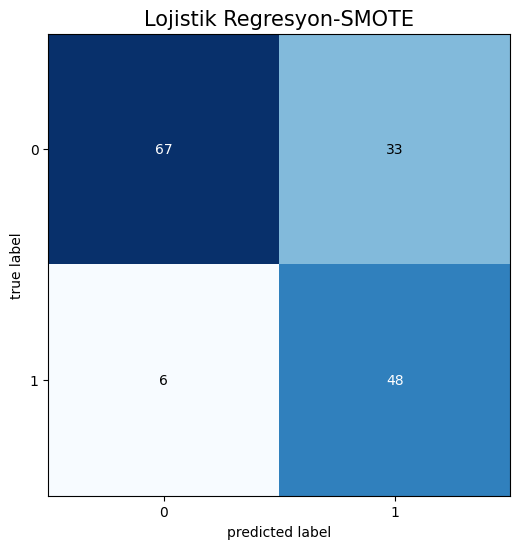

In [304]:
conf_m_lg_os=confusion_matrix(y_test,lg_os_pred)
pl_conf_mat('Lojistik Regresyon-SMOTE',conf_m_lg_os)

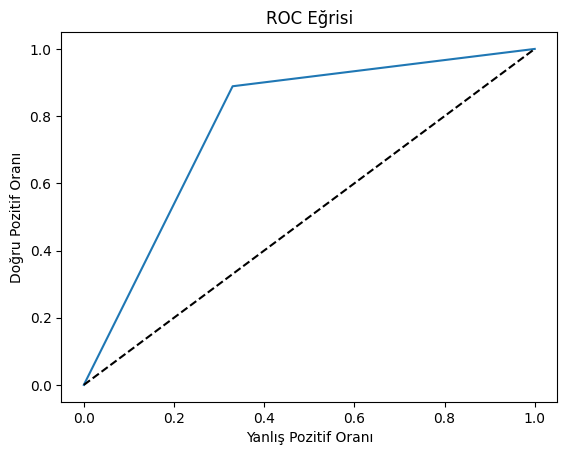

In [305]:
fpr, tpr, thresholds = roc_curve(y_test, lg_os_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.show()

## KNN SMOTE

In [306]:
knn_pipe = make_pipeline(KNNImputer(n_neighbors=5),MinMaxScaler(), KNeighborsClassifier())


knn_param_grid = {'kneighborsclassifier__n_neighbors': list(range(8, 20)),
                  'kneighborsclassifier__metric' : ['euclidian','chebyshev','minkowski','manhattan'] 
                 } 




knn_os_grid_search = GridSearchCV(estimator = knn_pipe, param_grid = knn_param_grid, 
                           scoring='accuracy', cv = kcv_index, 
                           return_train_score=True) 
knn_os_grid_search.fit(os_data_x,os_data_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric': ['euclidian',
                                                          'chebyshev',
                                                          'minkowski',
                                                          'manhattan'],
                         'kneighborsclassifier__n_neighbors': [8, 9, 10, 11, 12,
                                                               13, 14, 15, 16,
                                                               17, 18, 19]},
             return_train_score=True, scoring='accuracy')

In [307]:
knn_os_grid_search.best_score_

0.7810810810810811

In [308]:
knn_os_grid_search.best_params_

{'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 16}

In [309]:
knn_os_grid_search.score(X_test, y_test)*100

77.27272727272727

In [310]:
knn_os_pred = knn_os_grid_search.predict(X_test)
print(classification_report(y_test,knn_os_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       100
           1       0.65      0.78      0.71        54

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.77      0.78       154



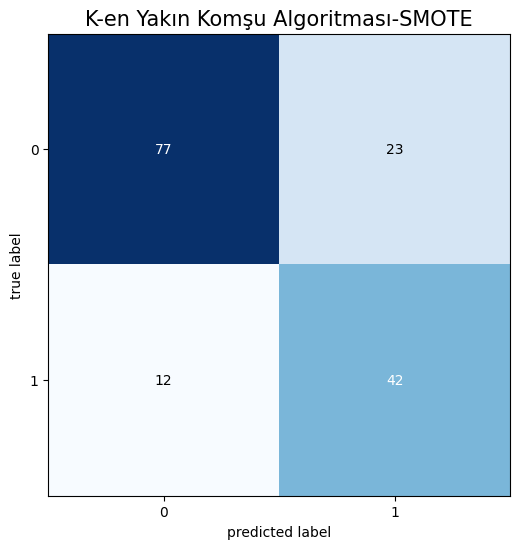

In [311]:
conf_m_knn_os=confusion_matrix(y_test,knn_os_pred)
pl_conf_mat('K-en Yakın Komşu Algoritması-SMOTE',conf_m_knn_os)

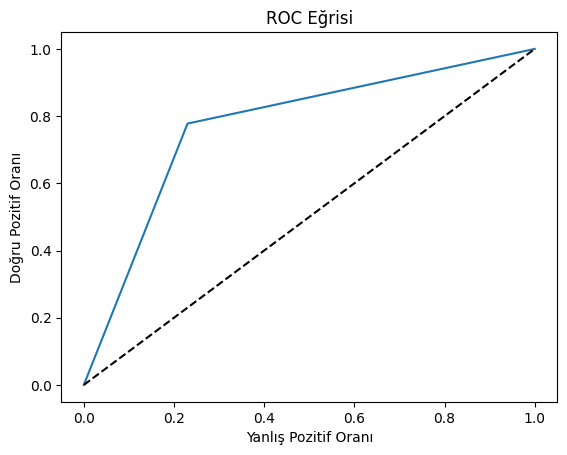

In [312]:
fpr, tpr, thresholds = roc_curve(y_test, knn_os_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.show()

## Naive-Bayes SMOTE

In [313]:
gb_pipe = make_pipeline(KNNImputer(n_neighbors=5), RobustScaler(), GaussianNB())


gb_param_grid = {'gaussiannb__var_smoothing': [0.0000001,0.00001,0.0001,0.001,0.01,0.06]}



gb_os_grid_search = GridSearchCV(estimator = gb_pipe, param_grid = gb_param_grid, 
                           scoring='accuracy', cv = kcv_index, 
                           return_train_score=True) 

In [314]:
gb_os_grid_search.fit(os_data_x,os_data_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('robustscaler', RobustScaler()),
                                       ('gaussiannb', GaussianNB())]),
             param_grid={'gaussiannb__var_smoothing': [1e-07, 1e-05, 0.0001,
                                                       0.001, 0.01, 0.06]},
             return_train_score=True, scoring='accuracy')

In [315]:
gb_os_grid_search.best_score_

0.731081081081081

In [316]:
gb_os_grid_search.best_params_

{'gaussiannb__var_smoothing': 0.06}

In [317]:
gb_os_grid_search.score(X_test, y_test)*100

68.18181818181817

In [318]:
gb_os_pred = gb_os_grid_search.predict(X_test)
print(classification_report(y_test,gb_os_pred))

              precision    recall  f1-score   support

           0       0.95      0.54      0.69       100
           1       0.53      0.94      0.68        54

    accuracy                           0.68       154
   macro avg       0.74      0.74      0.68       154
weighted avg       0.80      0.68      0.68       154



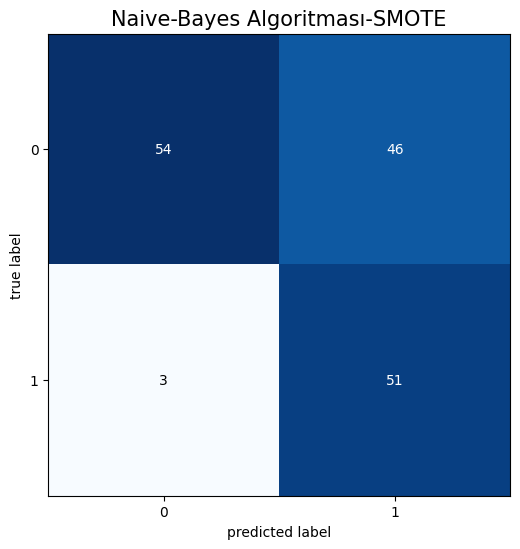

In [319]:
conf_m_gb_os=confusion_matrix(y_test,gb_os_pred)
pl_conf_mat('Naive-Bayes Algoritması-SMOTE',conf_m_gb_os)

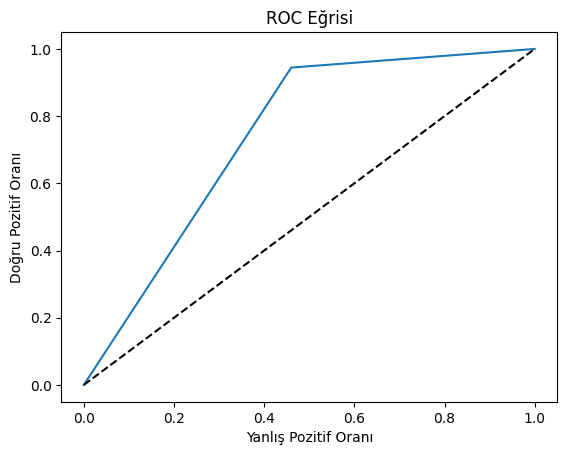

In [320]:
fpr, tpr, thresholds = roc_curve(y_test, gb_os_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.show()

## KARAR AĞAÇLARI SMOTE

In [321]:
dtc_pipe = make_pipeline(KNNImputer(n_neighbors=5),DecisionTreeClassifier(random_state=20))

dtc_params = {'decisiontreeclassifier__max_depth':[2,3,5,6,7,10,500],
         'decisiontreeclassifier__min_samples_leaf':[4,5,6,7,810,30,40,50,70,100],
         'decisiontreeclassifier__criterion': ["gini"],
         'decisiontreeclassifier__max_features': [0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,1,2,3,4,5]
         }

dtc_os_grid_search = GridSearchCV(estimator=dtc_pipe, param_grid=dtc_params,scoring='accuracy',cv=kcv_index)

In [322]:
dtc_os_grid_search.fit(os_data_x,os_data_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=20))]),
             param_grid={'decisiontreeclassifier__criterion': ['gini'],
                         'decisiontreeclassifier__max_depth': [2, 3, 5, 6, 7,
                                                               10, 500],
                         'decisiontreeclassifier__max_features': [0.3, 0.4, 0.5,
                                                                  0.6, 0.65,
                                                                  0.7, 0.75,
                                                                  0.8, 1, 2, 3,
                                                                  4, 5],
                         'decisiontreeclassifier__min_samples_leaf': [4, 5, 6,
                                                                      7, 810,
                                                                      30, 40,
                                                                      50, 70,
                                                                      100]},
             scoring='accuracy')

In [323]:
dtc_os_grid_search.best_score_

0.7972972972972973

In [324]:
dtc_os_grid_search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 6,
 'decisiontreeclassifier__max_features': 0.7,
 'decisiontreeclassifier__min_samples_leaf': 4}

In [325]:
dtc_os_grid_search.score(X_test, y_test)*100

79.22077922077922

In [326]:
dtc_os_pred = dtc_os_grid_search.predict(X_test)
print(classification_report(y_test,dtc_os_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       100
           1       0.67      0.81      0.73        54

    accuracy                           0.79       154
   macro avg       0.78      0.80      0.78       154
weighted avg       0.81      0.79      0.80       154



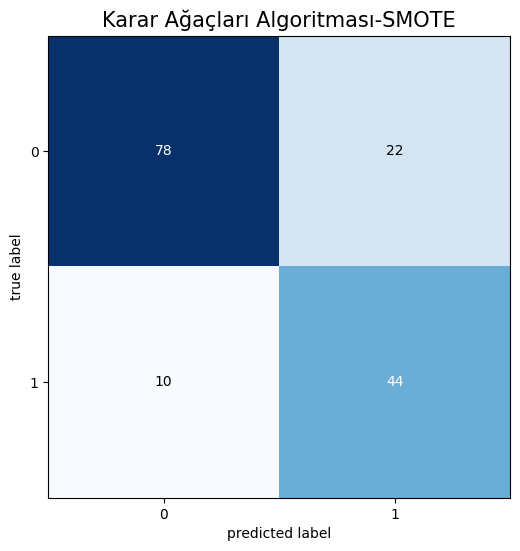

In [327]:
conf_m_dtc_os=confusion_matrix(y_test,dtc_os_pred)
pl_conf_mat('Karar Ağaçları Algoritması-SMOTE',conf_m_dtc_os)

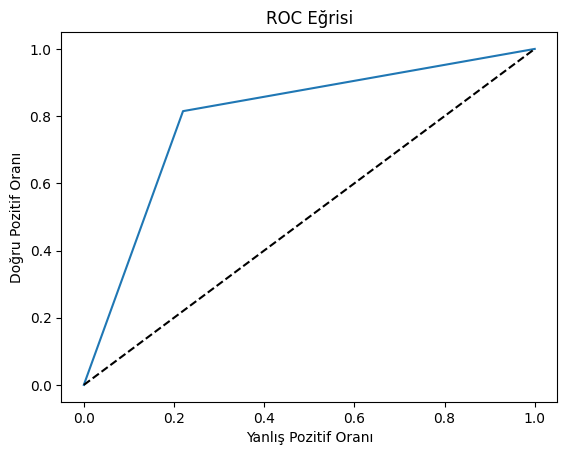

In [328]:
fpr, tpr, thresholds = roc_curve(y_test, dtc_os_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.show()

## Destek Vektör Makinaları

In [329]:
svc_pipe = make_pipeline(KNNImputer(n_neighbors=5),MinMaxScaler(),SVC())

param_SVC = {'svc__C': [0.1,1,2,2.05,2.1,2.2,2.5,2.7],  
            'svc__tol': [0.1,0.06,0.047,0.048,0.049,0.05,0.01,0.005], 
            'svc__gamma':["auto","scale"],
            'svc__kernel':["linear"]}   
   

svc_os_grid_search = GridSearchCV(estimator = svc_pipe, param_grid = param_SVC, 
                           scoring='accuracy', cv = kcv_index, 
                           return_train_score=True) 
   

In [330]:
svc_os_grid_search.fit(os_data_x,os_data_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 2, 2.05, 2.1, 2.2, 2.5, 2.7],
                         'svc__gamma': ['auto', 'scale'],
                         'svc__kernel': ['linear'],
                         'svc__tol': [0.1, 0.06, 0.047, 0.048, 0.049, 0.05,
                                      0.01, 0.005]},
             return_train_score=True, scoring='accuracy')

In [331]:
svc_os_grid_search.best_params_

{'svc__C': 1, 'svc__gamma': 'auto', 'svc__kernel': 'linear', 'svc__tol': 0.047}

In [332]:
svc_os_grid_search.best_score_

0.75

In [333]:
svc_os_grid_search.score(X_test, y_test)*100

74.02597402597402

In [334]:
svc_os_pred = svc_os_grid_search.predict(X_test)
print(classification_report(y_test,svc_os_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       100
           1       0.59      0.81      0.69        54

    accuracy                           0.74       154
   macro avg       0.73      0.76      0.73       154
weighted avg       0.78      0.74      0.75       154



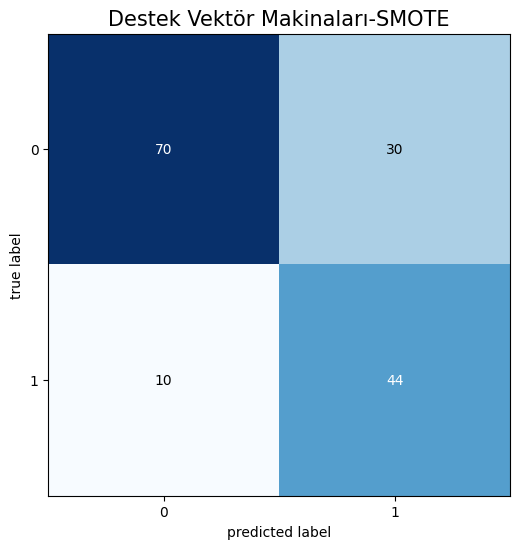

In [335]:
conf_m_svc_os=confusion_matrix(y_test,svc_os_pred)
pl_conf_mat('Destek Vektör Makinaları-SMOTE',conf_m_svc_os)

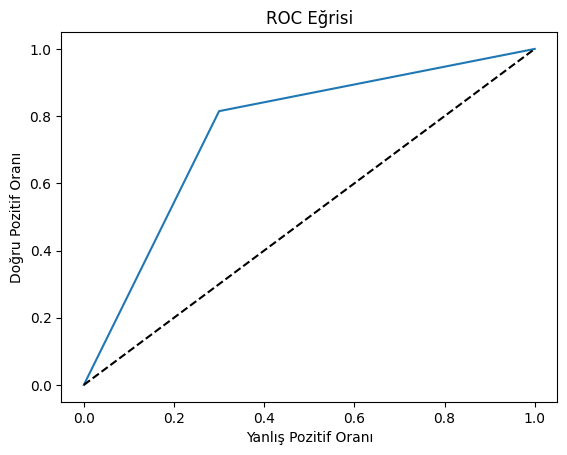

In [336]:
fpr, tpr, thresholds = roc_curve(y_test, svc_os_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.show()

## Rastgele Orman Algoritması

In [337]:
rf_pipe = make_pipeline(KNNImputer(n_neighbors=5),MinMaxScaler(),RandomForestClassifier(random_state=20))


param_rf = {'randomforestclassifier__n_estimators': [40],
            'randomforestclassifier__criterion': ["gini"],
            'randomforestclassifier__max_depth': [11],
            'randomforestclassifier__min_samples_leaf': [3]
           }




rf_os_grid = GridSearchCV(estimator = rf_pipe, param_grid = param_rf, 
                           scoring='accuracy', cv = kcv_index, 
                           return_train_score=True) 
## DOKUNMA 0.805

In [338]:
rf_pipe = make_pipeline(KNNImputer(n_neighbors=5),MinMaxScaler(),RandomForestClassifier(random_state=20))


param_rf = {'randomforestclassifier__n_estimators': [10,20,37,40],
            'randomforestclassifier__criterion': ["gini","entropy"],
            'randomforestclassifier__max_depth': [10,11,12],
            'randomforestclassifier__min_samples_leaf': [2,3,5],
            'randomforestclassifier__max_features':[0.3,0.4,0.5],
            'randomforestclassifier__min_samples_split':[10,20,30]}




rf_os_grid = GridSearchCV(estimator = rf_pipe, param_grid = param_rf, 
                           scoring='accuracy', cv = kcv_index, 
                           return_train_score=True) 
## DOKUNMA 0.785

In [339]:
rf_os_grid.fit(os_data_x,os_data_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=20))]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [10, 11, 12],
                         'randomforestclassifier__max_features': [0.3, 0.4,
                                                                  0.5],
                         'randomforestclassifier__min_samples_leaf': [2, 3, 5],
                         'randomforestclassifier__min_samples_split': [10, 20,
                                                                       30],
                         'randomforestclassifier__n_estimators': [10, 20, 37,
                                                                  40]},
             return_train_score=True, scoring='accuracy')

In [340]:
rf_os_grid.best_score_

0.8337837837837838

In [341]:
rf_os_grid.best_params_

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': 12,
 'randomforestclassifier__max_features': 0.5,
 'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__n_estimators': 20}

In [342]:
rf_os_grid.score(X_test, y_test)*100

75.97402597402598

In [343]:
rf_os_pred = rf_os_grid.predict(X_test)
print(classification_report(y_test,rf_os_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       100
           1       0.64      0.72      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



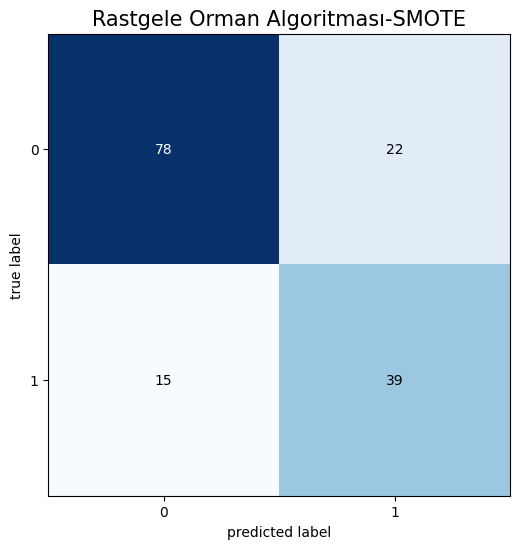

In [344]:
conf_m_rf_os=confusion_matrix(y_test,rf_os_pred)
pl_conf_mat('Rastgele Orman Algoritması-SMOTE',conf_m_rf_os)

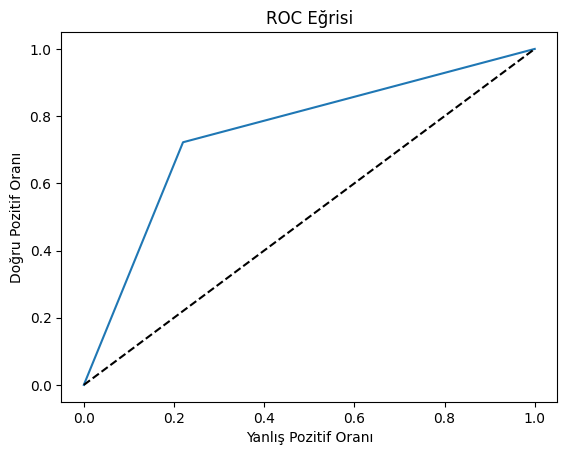

In [345]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf_os_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.show()

In [346]:

df = pd.DataFrame({'Eğitim Doğruluk Oranı': [79.8,79.26,76.48,79.1,80.56,80.2,76.49,78.1,73.1,79.72,75,82.2],
                   'Test Doğruluk Oranı': [76.62,77.27,70.74,74.67,75.3,78.6,74.67,77.27,68.1,79.22,74,80.5],
                   'Test Duyarlılık Oranı':[65,57,44,61,65,70,89,78,94,81,81,81]})


df = df.rename(index={0: 'Lojistik Regresyon', 1: 'K-en Yakın Komşu', 2: 'Naive-Bayes', 3: 'Karar Ağaçları',
                     4: 'Destek Vektör Makinaları', 5: 'Rastgele Orman', 6: 'Lojistik Regresyon-SMOTE',
                     7: 'K-en Yakın Komşu-SMOTE', 8: 'Naive-Bayes-SMOTE', 9: 'Karar Ağaçları-SMOTE',
                     10: 'Destek Vektör Makinaları-SMOTE', 11: 'Rastgele Orman-SMOTE' })
df

,Eğitim Doğruluk Oranı,Test Doğruluk Oranı,Test Duyarlılık Oranı
Lojistik Regresyon,79.80,76.62,65
K-en Yakın Komşu,79.26,77.27,57
Naive-Bayes,76.48,70.74,44
Karar Ağaçları,79.10,74.67,61
Destek Vektör Makinaları,80.56,75.30,65
Rastgele Orman,80.20,78.60,70
Lojistik Regresyon-SMOTE,76.49,74.67,89
K-en Yakın Komşu-SMOTE,78.10,77.27,78
Naive-Bayes-SMOTE,73.10,68.10,94
Karar Ağaçları-SMOTE,79.72,79.22,81


In [347]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df.index,
    y=df["Eğitim Doğruluk Oranı"],
    name='Eğitim veri setinde Doğruluk Oranı',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=df.index,
    y=df["Test Doğruluk Oranı"],
    name='Test veri setinde Doğruluk Oranı',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=df.index,
    y=df["Test Duyarlılık Oranı"],
    name='Test veri setinde Duyarlılık Oranı',
    marker_color='red'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [352]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(lg_grid_search, file)

# Load the model from the file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

    

In [353]:
from joblib import dump, load

# Save the model to a file
dump(lg_grid_search, 'model.joblib')

# Load the model from the file
loaded_model = load('model.joblib')

In [354]:
# Import necessary modules
import pickle

# Save the model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lg_grid_search, file)

# Load the model
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [355]:
import pickle

# If you used joblib to save the model, import it instead
# from joblib import load

In [359]:
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# If you used joblib to save the model
# loaded_model = load('model.joblib')

In [360]:
print(loaded_model)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid=[{'logisticregression__C': [0.6, 0.7, 0.8, 0.9, 1],
                          'logisticregression__max_iter': [10, 15, 20, 50],
                          'logisticregression__solver': ['liblinear', 'lbfgs'],
                          'logisticregression__tol': [0.6, 0.7, 0.8, 0.9, 1]}],
             return_train_score=True, scoring='accuracy')
